In [ ]:
!pip install torch torchvision
!python -m pip install pyyaml

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-o0jfi09o
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-o0jfi09o
  Resolved https://github.com/facebookresearch/detectron2.git to commit c69939aa85460e8135f40bce908a6cddaa73065f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.7 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp31

In [ ]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install fashionpedia

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-5c_tui4y
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-5c_tui4y
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=376058 sha256=95e9a594b0239d914a5c918183887f18c4f79fa6289c9c280a93ed50e5bc0bae
  Stored in directory: /tmp/pip-ephem-wheel-cache-q5jclkg7/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.8
    Uninstalling pycocotools-2.0.8:
      Successfully uninstalled pycocotools-2.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the f

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.5 ; cuda:  cu121
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
# # Download dataset from FashionPedia

# '''
# Use wget onto the links below, and then unzip the files. Also format it like COCO

# https://s3.amazonaws.com/ifashionist-dataset/images/train2020.zip
# https://s3.amazonaws.com/ifashionist-dataset/images/val_test2020.zip


# Annotations

# Detection: apparel object instance segmentation with localized attributes prediction:
# https://s3.amazonaws.com/ifashionist-dataset/annotations/instances_attributes_train2020.json
# https://s3.amazonaws.com/ifashionist-dataset/annotations/instances_attributes_val2020.json
# https://s3.amazonaws.com/ifashionist-dataset/annotations/info_test2020.json

# https://s3.amazonaws.com/ifashionist-dataset/annotations/attributes_train2020.json
# https://s3.amazonaws.com/ifashionist-dataset/annotations/attributes_val2020.json
# test_images_info2020: same as detection task

# '''

# from google.colab import drive
# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/Colab\ Notebooks

# %mkdir fashionpedia
# %cd fashionpedia

# #!wget https://s3.amazonaws.com/ifashionist-dataset/images/train2020.zip
# #!wget https://s3.amazonaws.com/ifashionist-dataset/images/val_test2020.zip
# #!unzip train2020.zip -d .
# !unzip val_test2020.zip -d .

# !wget https://s3.amazonaws.com/ifashionist-dataset/annotations/instances_attributes_train2020.json
# !wget https://s3.amazonaws.com/ifashionist-dataset/annotations/instances_attributes_val2020.json
# !wget https://s3.amazonaws.com/ifashionist-dataset/annotations/info_test2020.json
# !wget https://s3.amazonaws.com/ifashionist-dataset/annotations/attributes_train2020.json
# !wget https://s3.amazonaws.com/ifashionist-dataset/annotations/attributes_val2020.json
# # test_images_info2020 is presumably info_test2020.json




In [ ]:

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks

%cd fashionpedia

!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/fashionpedia
attributes_train2020.json  instances_attributes_train2020.json	test
attributes_val2020.json    instances_attributes_val2020.json	train
info_test2020.json	   output


In [ ]:
!ls

attributes_train2020.json  instances_attributes_train2020.json	test
attributes_val2020.json    instances_attributes_val2020.json	train
info_test2020.json	   output


In [ ]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances(
    "my_dataset_train",
    {},
    "instances_attributes_train2020.json",
    "train"
)

register_coco_instances(
    "my_dataset_val",
    {},
    "instances_attributes_val2020.json",
    "test"
)


[12/11 19:12:24 d2.data.datasets.coco]: Loading instances_attributes_train2020.json takes 10.96 seconds.
WARNING [12/11 19:12:24 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/11 19:12:24 d2.data.datasets.coco]: Loaded 45623 images in COCO format from instances_attributes_train2020.json


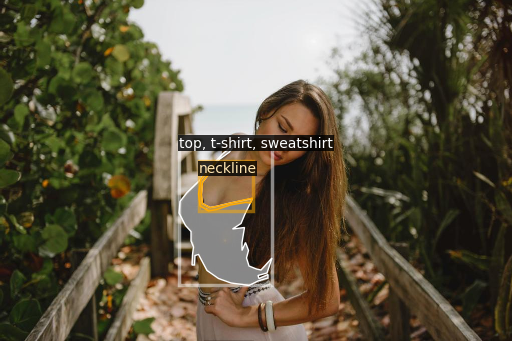

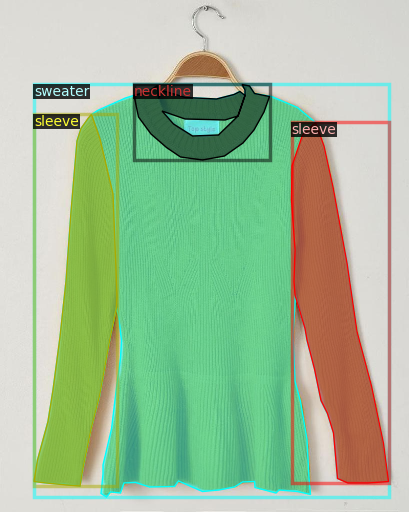

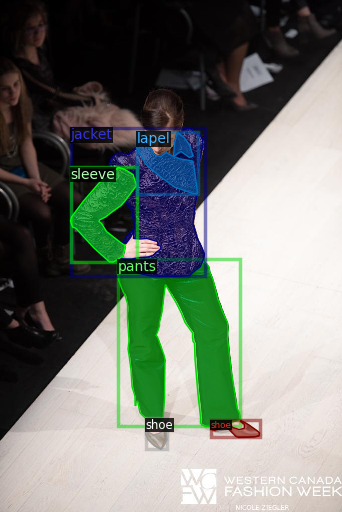

In [ ]:
dataset_dicts = DatasetCatalog.get("my_dataset_train")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get("my_dataset_train"), scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])


In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.MAX_ITER = 5000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 46  # 0-45
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

cfg.INPUT.MASK_FORMAT = "bitmask"


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[12/11 19:12:49 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:00, 249MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[12/11 19:13:06 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/detectron2/data/detection_utils.py:449: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  torch.stack([torch.from_numpy(np.ascontiguousarray(x)) for x in masks])
/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/11 19:13:30 d2.utils.events]:  eta: 1:06:49  iter: 19  total_loss: 5.423  loss_cls: 3.758  loss_box_reg: 0.2476  loss_mask: 0.6917  loss_rpn_cls: 0.6189  loss_rpn_loc: 0.09305    time: 0.8917  last_time: 0.7644  data_time: 0.4434  last_data_time: 0.2281   lr: 1.9981e-05  max_mem: 3238M


/usr/local/lib/python3.10/dist-packages/detectron2/data/detection_utils.py:449: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  torch.stack([torch.from_numpy(np.ascontiguousarray(x)) for x in masks])


[12/11 19:13:49 d2.utils.events]:  eta: 1:03:06  iter: 39  total_loss: 4.713  loss_cls: 3.165  loss_box_reg: 0.2957  loss_mask: 0.6909  loss_rpn_cls: 0.4612  loss_rpn_loc: 0.07674    time: 0.8191  last_time: 0.5457  data_time: 0.2421  last_data_time: 0.0037   lr: 3.9961e-05  max_mem: 3524M
[12/11 19:14:04 d2.utils.events]:  eta: 1:00:46  iter: 59  total_loss: 3.241  loss_cls: 1.832  loss_box_reg: 0.2786  loss_mask: 0.6874  loss_rpn_cls: 0.2834  loss_rpn_loc: 0.05703    time: 0.8112  last_time: 1.0012  data_time: 0.2712  last_data_time: 0.5537   lr: 5.9941e-05  max_mem: 3524M
[12/11 19:14:20 d2.utils.events]:  eta: 1:00:20  iter: 79  total_loss: 2.282  loss_cls: 0.8468  loss_box_reg: 0.3023  loss_mask: 0.685  loss_rpn_cls: 0.2515  loss_rpn_loc: 0.07603    time: 0.8035  last_time: 0.6623  data_time: 0.2335  last_data_time: 0.1486   lr: 7.9921e-05  max_mem: 3524M
[12/11 19:14:36 d2.utils.events]:  eta: 0:59:13  iter: 99  total_loss: 2.052  loss_cls: 0.6634  loss_box_reg: 0.3145  loss_mask

In [ ]:
!ls


attributes_train2020.json  instances_attributes_train2020.json	test
attributes_val2020.json    instances_attributes_val2020.json	train
info_test2020.json	   output


In [ ]:
from detectron2.modeling import build_model
model = build_model(cfg) # returns a torch.nn.Module

from detectron2.checkpoint import DetectionCheckpointer

checkpointer = DetectionCheckpointer(model, save_dir="output")
checkpointer.save("model_long") # save to output/model_final.pth

In [ ]:
!ls

attributes_train2020.json  instances_attributes_train2020.json	test
attributes_val2020.json    instances_attributes_val2020.json	train
info_test2020.json	   output


In [ ]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_long.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[12/11 01:57:26 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_long.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

In [ ]:
print("Number of thing_classes:", len(MetadataCatalog.get("my_dataset_val").thing_classes))
print("Model NUM_CLASSES:", cfg.MODEL.ROI_HEADS.NUM_CLASSES)


Number of thing_classes: 46
Model NUM_CLASSES: 46


WARNING [12/11 01:57:33 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/11 01:57:33 d2.data.datasets.coco]: Loaded 1158 images in COCO format from instances_attributes_val2020.json


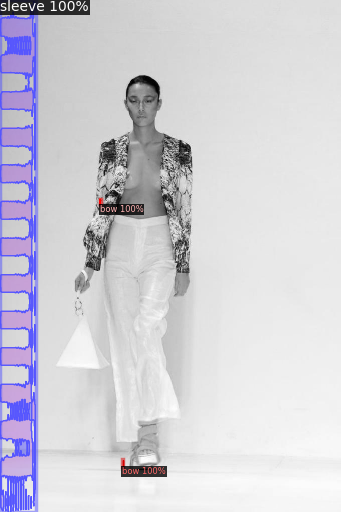

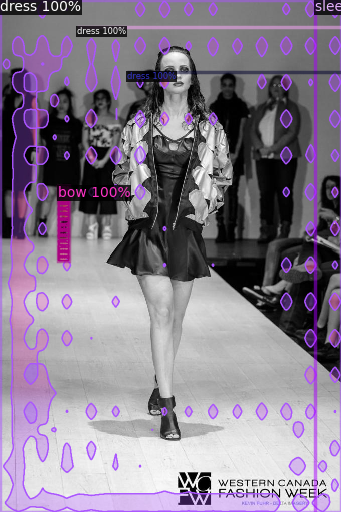

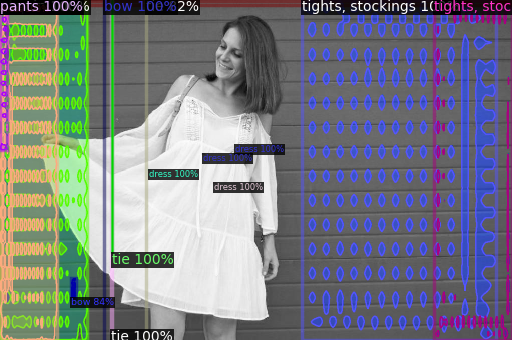

In [ ]:
from detectron2.utils.visualizer import ColorMode

dataset_dicts = DatasetCatalog.get("my_dataset_val")

fileNames = ["test/02b4423e161fa2409974174ec53cdb2a.jpg", "test/37a69cc82f0c8a2dd9a965a934072e24.jpg", "test/3185f1171c39e80614b4f767830f823a.jpg"]

metadata = MetadataCatalog.get("my_dataset_val")

for d in fileNames:
    im = cv2.imread(d)
    outputs = predictor(im)

    # outputs["instances"] contains:
    # - pred_boxes
    # - pred_masks (bitmasks)
    # - pred_classes
    # - scores

    v = Visualizer(im[:, :, ::-1],
                   metadata=metadata,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW)  # IMAGE_BW mode desaturates the background
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # In Colab/Jupyter:
    cv2_imshow(out.get_image()[:, :, ::-1])
    cv2.waitKey(0)
